# Multi-Class Deep Learning Model for CIFAR-10 Object Recognition Using Keras Take 1
### David Lowe
### December 30, 2019

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The CIFAR-10 dataset is a multi-class classification situation where we are trying to predict one of several (more than two) possible outcomes.

INTRODUCTION: The CIFAR-10 is a labeled subset of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

For this iteration, we will construct a simple VGG convolutional model with 1 VGG block to classify the images. This model will serve as the baseline for the future iterations of modeling.

ANALYSIS: In this iteration, the performance of the Take1 model with the default parameters achieved a maximum accuracy score of 69.52% on the validation dataset after training for 50 epochs. After tuning the hyperparameters, the Take1 model with the best hyperparameters processed the training dataset with an accuracy of 99.44%. The same model, however, processed the test dataset with an accuracy of only 68.86%. We will need to explore other modeling approaches to make a better model that reduces over-fitting.

CONCLUSION: For this dataset, the model built using Keras and TensorFlow achieved a satisfactory result and should be considered for future modeling activities.

Dataset Used: The CIFAR-10 Dataset

Dataset ML Model: Multi-class classification with numerical attributes

Dataset Reference: https://www.cs.toronto.edu/~kriz/cifar.html

One potential source of performance benchmarks: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

Any deep-learning modeling project genrally can be broken down into about six major tasks:

0. Prepare Environment
1. Load Data
2. Define Model
3. Fit and Evaluate Model
4. Optimize Model
5. Finalize Model

# Section 0. Prepare Environment

In [1]:
# Set the warning message filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Set the random seed number for reproducible results
seedNum = 888

In [3]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# import keras as K
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing

In [4]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting to True will activate)
# verbose = True
# tf.debugging.set_log_device_placement(verbose)

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set various default Keras modeling parameters
default_loss = 'categorical_crossentropy'
default_metrics = ['accuracy']
default_kernel_init = tf.initializers.he_uniform(seed=seedNum)
default_optimizer = tf.optimizers.SGD(learning_rate=0.001, momentum=0.9)
default_epoch = 50
default_batch = 64

Num GPUs Available:  1


In [5]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if sender==None or receiver==None or gateway==None or smtpuser==None or password==None:
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Keras Multi-Class Classification Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [6]:
# Reset the random number generators
def reset_random(seedNum):
    random.seed(seedNum)
    np.random.seed(seedNum)
    tf.random.set_seed(seedNum)

In [7]:
if (notifyStatus): email_notify("Phase 0 Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 1. Load Data

In [8]:
if (notifyStatus): email_notify("Phase 1 Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 1.a) Load Dataset

In [9]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

# Summarize loaded datasets
print('Train Shape: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test Shape: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train Shape: X=(50000, 32, 32, 3), y=(50000, 1)
Test Shape: X=(10000, 32, 32, 3), y=(10000, 1)


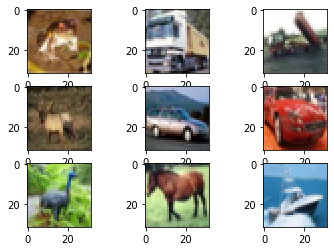

In [10]:
# Plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## 1.b) Data Cleaning

In [11]:
# Not required for this iteration of the project

## 1.c) Feature Scaling and Pre-processing

In [12]:
# Reshape the input data as [samples][width][height][channels]
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Apply feature scaling and transformation
X_train = X_train / 255.0
X_test = X_test / 255.0

## 1.d) Splitting Data into Training and Test Sets

In [13]:
# Encode class values as integers and perform one-hot-encoding
encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
train_transformed = encoder.transform(y_train)
test_transformed = encoder.transform(y_test)
y_train = tf.keras.utils.to_categorical(train_transformed)
y_test = tf.keras.utils.to_categorical(test_transformed)

print('Train Shape: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test Shape: X=%s, y=%s' % (X_test.shape, y_test.shape))

num_pixels = X_train.shape[1] * X_train.shape[2]
print('Number of pixels:', num_pixels)
num_classes = y_train.shape[1]
print('Number of classes:', num_classes)

Train Shape: X=(50000, 32, 32, 3), y=(50000, 10)
Test Shape: X=(10000, 32, 32, 3), y=(10000, 10)
Number of pixels: 1024
Number of classes: 10


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
if (notifyStatus): email_notify("Phase 1 Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 2. Define Model

In [15]:
if (notifyStatus): email_notify("Phase 2 Define Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [16]:
# Define the Keras model for baseline measurement
def create_default_model():
    default_model = Sequential()
    default_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=default_kernel_init, padding='same', input_shape=(32, 32, 3)))
    default_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=default_kernel_init, padding='same'))
    default_model.add(MaxPooling2D((2, 2)))
    default_model.add(Flatten())
    default_model.add(Dense(num_pixels, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(num_classes, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

In [17]:
# Not applicable for this iteration of the project
# Define the Callback class and early-stopping function
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy') > 0.9):
#             print("\nReached 90% accuracy so cancelling training!")
#             self.model.stop_training = True

# callbacks = myCallback()

In [18]:
if (notifyStatus): email_notify("Phase 2 Define Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 3. Fit and Evaluate Model

In [19]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [20]:
# Initialize the baseline model
startTimeModule = datetime.now()
reset_random(seedNum)
baseline_model = create_default_model()
baseline_hist = baseline_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch,
                                   validation_data=(X_test, y_test), verbose=1)
print('Total time for creating the baseline model:', (datetime.now() - startTimeModule))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 232us/sample - loss: 1.7181 - accuracy: 0.3941 - val_loss: 1.4818 - val_accuracy: 0.4798
Epoch 2/50
50000/50000 [==============================] - 10s 195us/sample - loss: 1.3978 - accuracy: 0.5080 - val_loss: 1.3197 - val_accuracy: 0.5398
Epoch 3/50
50000/50000 [==============================] - 10s 196us/sample - loss: 1.2386 - accuracy: 0.5658 - val_loss: 1.2033 - val_accuracy: 0.5745
Epoch 4/50
50000/50000 [==============================] - 10s 197us/sample - loss: 1.1269 - accuracy: 0.6068 - val_loss: 1.1778 - val_accuracy: 0.5861
Epoch 5/50
50000/50000 [==============================] - 10s 197us/sample - loss: 1.0342 - accuracy: 0.6406 - val_loss: 1.1303 - val_accuracy: 0.5970
Epoch 6/50
50000/50000 [==============================] - 10s 197us/sample - loss: 0.9586 - accuracy: 0.6683 - val_loss: 1.0424 - val_accuracy: 0.6372
Epoch 7/50
50000/50000 [====================

In [21]:
# Display a summary of the baseline model
print(baseline_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8389632   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 8,410,026
Trainable params: 8,410,026
Non-trainable params: 0
______________________________________________

In [22]:
# Display the configuration of the baseline model
print(baseline_model.get_config())

{'name': 'sequential', 'layers': [{'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling'

In [23]:
# List all data points in the baseline model training history
print(baseline_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


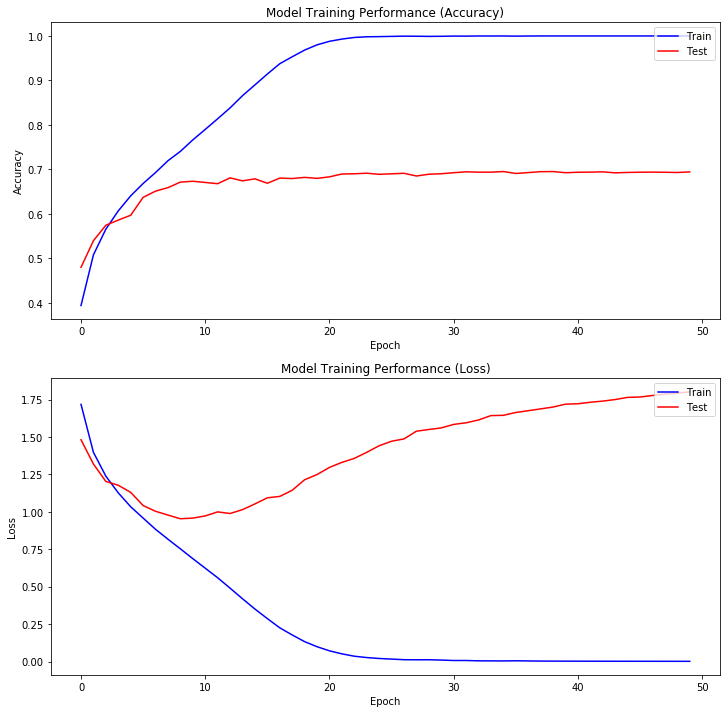

In [24]:
# Summarize model training hisotry for accuracy and loss
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [25]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 4. Optimize Model

In [26]:
if (notifyStatus): email_notify("Phase 4 Optimize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [27]:
# Define the Keras model required for KerasClassifier
def create_customized_model(optimizer, kernel_init):
    customized_model = Sequential()
    customized_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=default_kernel_init, padding='same', input_shape=(32, 32, 3)))
    customized_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=default_kernel_init, padding='same'))
    customized_model.add(MaxPooling2D((2, 2)))
    customized_model.add(Flatten())
    customized_model.add(Dense(num_pixels, activation='relu', kernel_initializer=kernel_init))
    customized_model.add(Dense(num_classes, activation='softmax', kernel_initializer=kernel_init))
    customized_model.compile(loss=default_loss, optimizer=optimizer, metrics=default_metrics)
    return customized_model

In [28]:
startTimeModule = datetime.now()

# Set up grid search using different epochs, batch sizes, and optimizers
optz_1 = tf.optimizers.Adam(learning_rate=0.001)
optz_2 = tf.optimizers.RMSprop(learning_rate=0.001)
optz_3 = tf.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer_grid = [optz_1, optz_2, optz_3]
print('Optimizer candidate #1 has the object ID of', optz_1)
print('Optimizer candidate #2 has the object ID of', optz_2)
print('Optimizer candidate #3 has the object ID of', optz_3)

init_1 = tf.initializers.RandomNormal(seed=seedNum)
init_2 = tf.initializers.Orthogonal(seed=seedNum)
init_3 = tf.initializers.he_uniform(seed=seedNum)
init_grid = [init_1, init_2, init_3]
print('Initializer candidate #1 has the object ID of', init_1)
print('Initializer candidate #2 has the object ID of', init_2)
print('Initializer candidate #3 has the object ID of', init_3)

epoch_grid = [50]
batch_grid = [64, 128]

best_score = 0
grid_iteration = 0
best_iteration = 0
best_optimizer = default_optimizer
best_kernel_init = default_kernel_init
best_epoch = default_epoch
best_batch = default_batch

for optimizer in optimizer_grid:
    for kernel_init in init_grid:
        for epoch_num in epoch_grid:
            for batch_num in batch_grid:
                print('\nForming the grid-search model #%d using: optimizer=%s, kernel=%s, epochs=%d, batch_size=%d'
                      % (grid_iteration, optimizer, kernel_init, epoch_num, batch_num))
                reset_random(seedNum)
                grid_model = create_customized_model(optimizer, kernel_init)
                grid_hist = grid_model.fit(X_train, y_train, epochs=epoch_num, batch_size=batch_num, 
                                       validation_data=(X_test, y_test), verbose=1)
                if(grid_hist.history['val_accuracy'][-1] > best_score):
                    best_score = grid_hist.history['val_accuracy'][-1]
                    best_iteration = grid_iteration
                    best_optimizer = optimizer
                    best_kernel_init = kernel_init
                    best_epoch = epoch_num
                    best_batch = batch_num
                grid_iteration = grid_iteration + 1

# summarize results
print("\nBest score (highest validation accuracy) found via grid search: accuracy=%f from model iteration #%d"
      % (best_score, best_iteration))
print('The best modeling parameters are: optimizer=%s, kernel=%s, epochs=%d, batch_size=%d'
      % (best_optimizer, best_kernel_init, best_epoch, best_batch))
print('Total time for performing grid-search of the best parameters:', (datetime.now() - startTimeModule))

Optimizer candidate #1 has the object ID of <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa60036d908>
Optimizer candidate #2 has the object ID of <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x7fa60036d630>
Optimizer candidate #3 has the object ID of <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa60036d550>
Initializer candidate #1 has the object ID of <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7fa60036d898>
Initializer candidate #2 has the object ID of <tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7fa60036d9b0>
Initializer candidate #3 has the object ID of <tensorflow.python.ops.init_ops_v2.VarianceScaling object at 0x7fa60036d400>

Forming the grid-search model #0 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa60036d908>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7fa60036d898>, epochs=50, batch_size=64
Train on 50000 samples, validate on

In [29]:
if (notifyStatus): email_notify("Phase 4 Optimize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 5. Finalize Model

In [30]:
if (notifyStatus): email_notify("Phase 5 Finalize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [31]:
# Create the final model for evaluating the test dataset
startTimeModule = datetime.now()
print('Forming the final model using: optimizer=%s, kernel=%s, epochs=%d, batch_size=%d'
      % (best_optimizer, best_kernel_init, best_epoch, best_batch))
reset_random(seedNum)
final_model = create_customized_model(best_optimizer, best_kernel_init)
final_hist = final_model.fit(X_train, y_train, epochs=best_epoch, batch_size=best_batch, verbose=1)
print('Total time for training the final model:', (datetime.now() - startTimeModule))

Forming the final model using: optimizer=<tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x7fa60036d630>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7fa60036d9b0>, epochs=50, batch_size=64
Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 257us/sample - loss: 1.4123 - accuracy: 0.5177
Epoch 2/50
50000/50000 [==============================] - 12s 236us/sample - loss: 0.8628 - accuracy: 0.7018
Epoch 3/50
50000/50000 [==============================] - 12s 238us/sample - loss: 0.5804 - accuracy: 0.7990
Epoch 4/50
50000/50000 [==============================] - 12s 238us/sample - loss: 0.3379 - accuracy: 0.8868
Epoch 5/50
50000/50000 [==============================] - 12s 239us/sample - loss: 0.1715 - accuracy: 0.9434
Epoch 6/50
50000/50000 [==============================] - 12s 236us/sample - loss: 0.0926 - accuracy: 0.9707
Epoch 7/50
50000/50000 [==============================] - 12s 236us/sample - loss: 0.0618 - accu

In [32]:
# Display a summary of the final model
print(final_model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dense_39 (Dense)             (None, 10)                10250     
Total params: 8,410,026
Trainable params: 8,410,026
Non-trainable params: 0
___________________________________________

In [33]:
# Display the configuration of the final model
print(final_model.get_config())

{'name': 'sequential_19', 'layers': [{'class_name': 'Conv2D', 'config': {'name': 'conv2d_38', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_39', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceS

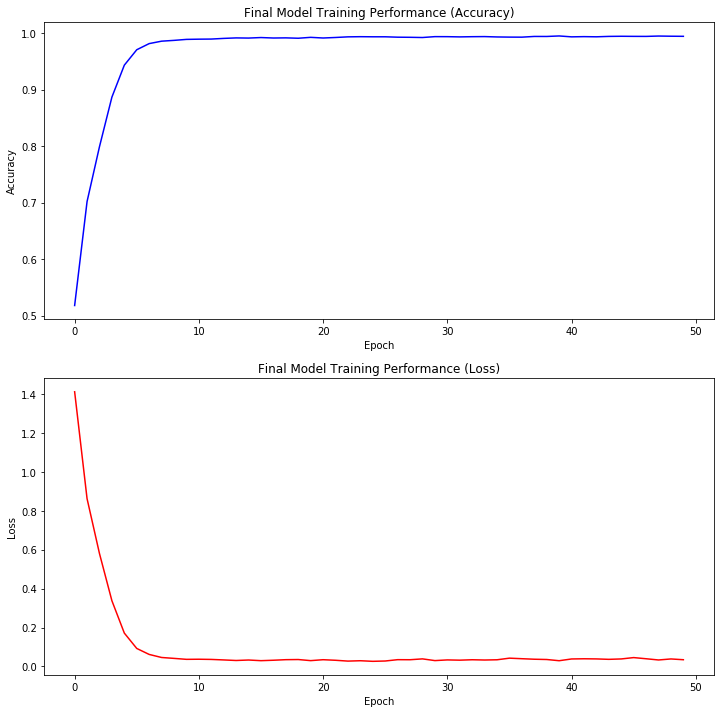

In [34]:
# Summarize model training hisotry for accuracy and loss
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(final_hist.history['accuracy'], color='blue')
plt.title('Final Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(212)
plt.plot(final_hist.history['loss'], color='red')
plt.title('Final Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [35]:
# Evaluate the Keras model on previously unseen data
scores = final_model.evaluate(X_test, y_test, verbose=0)
print("The model %s: %f%%" % (final_model.metrics_names[1], scores[1]*100))
print("The model %s: %f" % (final_model.metrics_names[0], scores[0]))

The model accuracy: 68.860000%
The model loss: 8.514334


In [36]:
# Make class predictions with the model
predictions = final_model.predict_classes(X_test)

# Summarize the first 20 cases
for i in range(20):
	print('Data item #%d predicted to be %s (expected %s)' % (i, encoder.inverse_transform([predictions[i]]), encoder.inverse_transform([np.argmax(y_test[i])])))

Data item #0 predicted to be [3] (expected [3])
Data item #1 predicted to be [1] (expected [8])
Data item #2 predicted to be [8] (expected [8])
Data item #3 predicted to be [0] (expected [0])
Data item #4 predicted to be [4] (expected [6])
Data item #5 predicted to be [6] (expected [6])
Data item #6 predicted to be [1] (expected [1])
Data item #7 predicted to be [6] (expected [6])
Data item #8 predicted to be [3] (expected [3])
Data item #9 predicted to be [1] (expected [1])
Data item #10 predicted to be [4] (expected [0])
Data item #11 predicted to be [9] (expected [9])
Data item #12 predicted to be [5] (expected [5])
Data item #13 predicted to be [7] (expected [7])
Data item #14 predicted to be [9] (expected [9])
Data item #15 predicted to be [8] (expected [8])
Data item #16 predicted to be [5] (expected [5])
Data item #17 predicted to be [6] (expected [7])
Data item #18 predicted to be [8] (expected [8])
Data item #19 predicted to be [6] (expected [6])


In [37]:
if (notifyStatus): email_notify("Phase 5 Finalize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [38]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 2:44:32.512420
